In [ ]:
%%capture

!pip install ffn yfinance
!pip install --upgrade pandas_datareader
wget https://www.csie.ntu.edu.tw/~d00922011/python/data/tx.csv

In [ ]:
import ffn
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (10, 5),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

In [ ]:
tbl = pd.DataFrame(yf.download("^twii", start = "2021-07-01")["Close"])
tbl

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2021-07-01,17713.939453
2021-07-02,17710.150391
2021-07-05,17919.330078
2021-07-06,17913.070312
2021-07-07,17850.689453
2021-07-08,17866.089844
2021-07-09,17661.480469
2021-07-12,17814.330078
2021-07-13,17847.519531


In [ ]:
df = pd.read_csv("tx.csv", encoding = "big5")
df = df.loc[df["交易時段"] == "一般"]
df.set_index("交易日期", inplace = True)
df = df[["到期月份(週別)", "收盤價", "未沖銷契約數"]]
df["收盤價"] = df["收盤價"].apply(lambda x : int(x) if x != "-" else None)
df["未沖銷契約數"] = df["未沖銷契約數"].apply(lambda x : int(x) if x != "-" else None)
df.head(20)

,到期月份(週別),收盤價,未沖銷契約數
交易日期,,,
2021/7/1,202107,17646.0,73071
2021/7/1,202108,17427.0,3929
2021/7/1,202109,17305.0,10591
2021/7/1,202112,17107.0,4029
2021/7/1,202203,16937.0,854
2021/7/1,202206,16839.0,103
2021/7/2,202107,17653.0,72240
2021/7/2,202108,17430.0,3936
2021/7/2,202109,17337.0,10587


In [ ]:
tbl2 = df.loc[df["到期月份(週別)"].apply(lambda x : str(x).replace(" ", "")) == "202107"]
tbl3 = pd.merge(tbl, tbl2[["收盤價", "未沖銷契約數"]], left_index = True, right_index = True, how = "left")
tbl3.columns = ["TWII", "TX", "TX OI"]
tbl3

,TWII,TX,TX OI
2021-07-01,17713.939453,17646.0,73071.0
2021-07-02,17710.150391,17653.0,72240.0
2021-07-05,17919.330078,17898.0,76556.0
2021-07-06,17913.070312,17878.0,74329.0
2021-07-07,17850.689453,17830.0,72671.0
2021-07-08,17866.089844,17825.0,72327.0
2021-07-09,17661.480469,17658.0,71436.0
2021-07-12,17814.330078,17824.0,71095.0
2021-07-13,17847.519531,17869.0,73478.0
2021-07-14,17845.750000,17874.0,69796.0


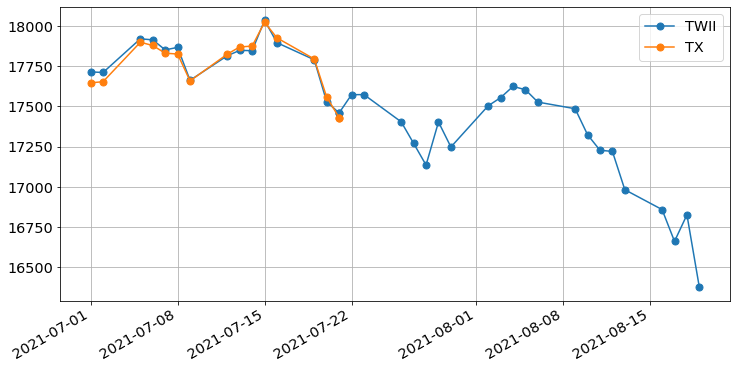

In [ ]:
tbl3[["TWII", "TX"]].plot.line(marker = ".", ms = 14, figsize = (12, 6), grid = True)

In [ ]:
tbl4 = df.loc[df["到期月份(週別)"].apply(lambda x : str(x).replace(" ", "")) == "202108"]
tbl5 = pd.merge(tbl3, tbl4[["收盤價", "未沖銷契約數"]], left_index = True, right_index = True, how = "left")
tbl5.columns = ["TWII", "TX (202107)", "TX (202107) OI", "TX (202108)", "TX (202108) OI"]
tbl5

,TWII,TX (202107),TX (202107) OI,TX (202108),TX (202108) OI
2021-07-01,17713.939453,17646.0,73071.0,17427.0,3929.0
2021-07-02,17710.150391,17653.0,72240.0,17430.0,3936.0
2021-07-05,17919.330078,17898.0,76556.0,17674.0,4018.0
2021-07-06,17913.070312,17878.0,74329.0,17663.0,4097.0
2021-07-07,17850.689453,17830.0,72671.0,17613.0,4234.0
2021-07-08,17866.089844,17825.0,72327.0,17599.0,4538.0
2021-07-09,17661.480469,17658.0,71436.0,17445.0,4787.0
2021-07-12,17814.330078,17824.0,71095.0,17605.0,4934.0
2021-07-13,17847.519531,17869.0,73478.0,17650.0,5394.0
2021-07-14,17845.750000,17874.0,69796.0,17651.0,5630.0


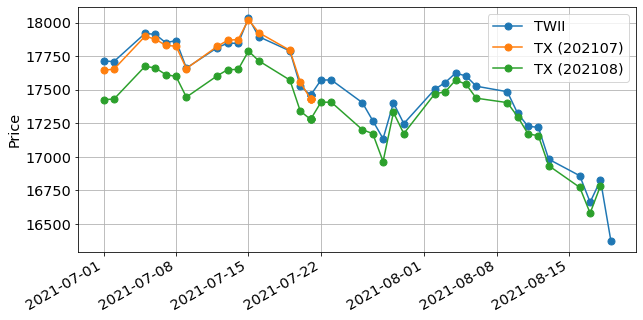

In [ ]:
fig = tbl5[["TWII", "TX (202107)", "TX (202108)"]].plot.line(marker = ".", ms = 14, grid = True, ylabel = "Price").get_figure()

In [ ]:
fig.tight_layout()
fig.savefig("futures_prices.pdf")

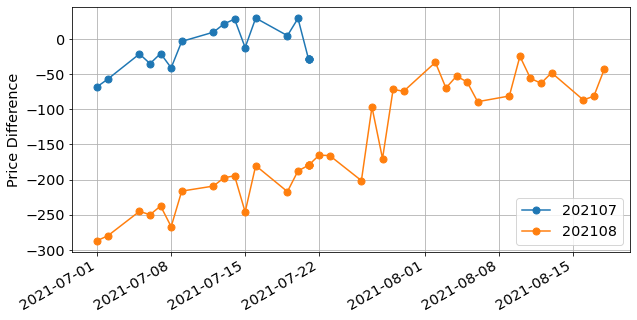

In [ ]:
(tbl5["TX (202107)"] - tbl5["TWII"]).plot.line(marker = ".", ms = 14, grid = True, ylabel = "Price Difference", label = "202107")
fig = (tbl5["TX (202108)"] - tbl5["TWII"]).plot.line(marker = ".", ms = 14, grid = True, ylabel = "Price Difference", label = "202108").get_figure()
plt.legend()

In [ ]:
fig.tight_layout()
fig.savefig("fut_spot_price_difference.pdf")

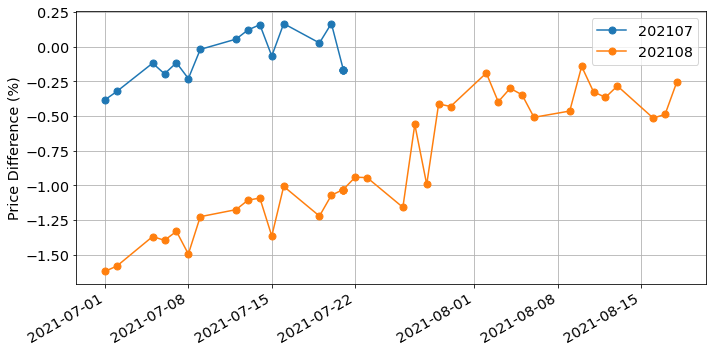

In [ ]:
((tbl5["TX (202107)"] - tbl5["TWII"]) / tbl5["TWII"] * 100).plot.line(marker = ".", ms = 14, grid = True, ylabel = "Price Difference (%)", label = "202107")
fig = ((tbl5["TX (202108)"] - tbl5["TWII"])  / tbl5["TWII"] * 100).plot.line(marker = ".", ms = 14, grid = True, ylabel = "Price Difference (%)", label = "202108").get_figure()
plt.legend()
fig.tight_layout()
fig.savefig("fut_spot_price_difference_percentage.pdf")